# Grouping and Aggregation

In [1]:
import polars as pl
import polars.selectors as cs
import plotly.express as ex

In [2]:
CSV_FILE = "./data/titanic.csv"

# Statistics

In [3]:
df = pl.read_csv(CSV_FILE)
df.head(3)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S"""


In [4]:
df.mean()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
f64,f64,f64,str,str,f64,f64,f64,str,f64,str,str
446.0,0.383838,2.308642,null,null,29.699118,0.523008,0.381594,null,32.204208,null,null


In [5]:
df.describe()

statistic,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
str,f64,f64,f64,str,str,f64,f64,f64,str,f64,str,str
"""count""",891.0,891.0,891.0,"""891""","""891""",714.0,891.0,891.0,"""891""",891.0,"""204""","""889"""
"""null_count""",0.0,0.0,0.0,"""0""","""0""",177.0,0.0,0.0,"""0""",0.0,"""687""","""2"""
"""mean""",446.0,0.383838,2.308642,null,null,29.699118,0.523008,0.381594,null,32.204208,null,null
"""std""",257.353842,0.486592,0.836071,null,null,14.526497,1.102743,0.806057,null,49.693429,null,null
"""min""",1.0,0.0,1.0,"""Abbing, Mr. Anthony""","""female""",0.42,0.0,0.0,"""110152""",0.0,"""A10""","""C"""
"""25%""",224.0,0.0,2.0,null,null,20.0,0.0,0.0,null,7.925,null,null
"""50%""",446.0,0.0,3.0,null,null,28.0,0.0,0.0,null,14.4542,null,null
"""75%""",669.0,1.0,3.0,null,null,38.0,1.0,0.0,null,31.0,null,null
"""max""",891.0,1.0,3.0,"""van Melkebeke, Mr. Philemon""","""male""",80.0,8.0,6.0,"""WE/P 5735""",512.3292,"""T""","""S"""


In [6]:
df.describe(percentiles=(0.1, 0.3, 0.5, 0.7, 0.9))

statistic,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
str,f64,f64,f64,str,str,f64,f64,f64,str,f64,str,str
"""count""",891.0,891.0,891.0,"""891""","""891""",714.0,891.0,891.0,"""891""",891.0,"""204""","""889"""
"""null_count""",0.0,0.0,0.0,"""0""","""0""",177.0,0.0,0.0,"""0""",0.0,"""687""","""2"""
"""mean""",446.0,0.383838,2.308642,null,null,29.699118,0.523008,0.381594,null,32.204208,null,null
"""std""",257.353842,0.486592,0.836071,null,null,14.526497,1.102743,0.806057,null,49.693429,null,null
"""min""",1.0,0.0,1.0,"""Abbing, Mr. Anthony""","""female""",0.42,0.0,0.0,"""110152""",0.0,"""A10""","""C"""
…,…,…,…,…,…,…,…,…,…,…,…,…
"""30%""",268.0,0.0,2.0,null,null,22.0,0.0,0.0,null,8.05,null,null
"""50%""",446.0,0.0,3.0,null,null,28.0,0.0,0.0,null,14.4542,null,null
"""70%""",624.0,1.0,3.0,null,null,36.0,1.0,0.0,null,27.0,null,null


In [7]:
(
    df
    .select(
        pl.col("Fare").mean()
    )
)

Fare
f64
32.204208


In [8]:
df_rolling = (
    pl.DataFrame(
        {
            "value": range(12)
        }
    )
)
df_rolling

value
i64
0
1
2
3
4
…
7
8
9


In [9]:
(
    df_rolling
    .with_columns(
        rolling_mean_value = pl.col("value").rolling_mean(window_size=3)
    )
)

value,rolling_mean_value
i64,f64
0,null
1,null
2,1.0
3,2.0
4,3.0
…,…
7,6.0
8,7.0
9,8.0


In [10]:
(
    df_rolling
    .with_columns(
        rolling_mean_value = pl.col("value").rolling_mean(window_size=3),
        rolling_mean_value_min_periods = pl.col("value").rolling_mean(window_size=3, min_samples=1)
    )
)

value,rolling_mean_value,rolling_mean_value_min_periods
i64,f64,f64
0,null,0.0
1,null,0.5
2,1.0,1.0
3,2.0,2.0
4,3.0,3.0
…,…,…
7,6.0,6.0
8,7.0,7.0
9,8.0,8.0


In [11]:
(
    df_rolling
    .with_columns(
        rolling_mean_value_center = pl.col("value").rolling_mean(window_size=3, center=True)
    )
)

value,rolling_mean_value_center
i64,f64
0,null
1,1.0
2,2.0
3,3.0
4,4.0
…,…
7,7.0
8,8.0
9,9.0


In [12]:
(
    df_rolling
    .with_columns(
        rolling_mean_value = pl.col("value").rolling_mean(window_size=3),
        ewm_mean_value = pl.col("value").ewm_mean(span=3),
        ewm_mean_high_span = pl.col("value").ewm_mean(span=5)
    )
)

value,rolling_mean_value,ewm_mean_value,ewm_mean_high_span
i64,f64,f64,f64
0,null,0.0,0.0
1,null,0.666667,0.6
2,1.0,1.428571,1.263158
3,2.0,2.266667,1.984615
4,3.0,3.16129,2.758294
…,…,…,…
7,6.0,6.031373,5.324822
8,7.0,7.017613,6.240363
9,8.0,8.009775,7.176476


In [13]:
(
    df_rolling
    .select(
        pl.col(pl.Int64).min().name.suffix("_min"),
        pl.col(pl.Int64).max().name.suffix("_max")
    )
)

value_min,value_max
i64,i64
0,11


In [14]:
(
    df
    .with_columns(
        ((pl.col("Fare") - pl.col("Fare").min()) / (pl.col("Fare").max() - pl.col("Fare").min())).name.suffix("_scaled")
    )
    .select("Fare", "Fare_scaled")
    .sort("Fare", descending=True)
)

Fare,Fare_scaled
f64,f64
512.3292,1.0
512.3292,1.0
512.3292,1.0
263.0,0.513342
263.0,0.513342
…,…
0.0,0.0
0.0,0.0
0.0,0.0


In [15]:
df_hor = pl.DataFrame(
    {
        "vals1": [0, 1, 2],
        "val2": [3, 4, 5]
    }
)
df_hor

vals1,val2
i64,i64
0,3
1,4
2,5


In [16]:
(
    df_hor
    .with_columns(
        pl.max_horizontal(pl.all()).alias("max"),
        pl.min_horizontal(pl.all()).alias("min"),
        pl.sum_horizontal(pl.all()).alias("sum")
    )
)

vals1,val2,max,min,sum
i64,i64,i64,i64,i64
0,3,3,0,3
1,4,4,1,5
2,5,5,2,7


In [17]:
(
    df_hor
    .max_horizontal()
)

max
i64
3
4
5


In [18]:
(
    df_hor
    .with_columns(
        pl.cum_sum_horizontal(pl.all())
    )
)

vals1,val2,cum_sum
i64,i64,struct[2]
0,3,"{0,3}"
1,4,"{1,5}"
2,5,"{2,7}"


In [19]:
(
    df_hor
    .with_columns(
        pl.concat_list(pl.all()).alias("concat")
    )
)

vals1,val2,concat
i64,i64,list[i64]
0,3,"[0, 3]"
1,4,"[1, 4]"
2,5,"[2, 5]"


In [20]:
df = pl.read_csv(CSV_FILE)
df.head(3)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S"""


In [21]:
df["Pclass"].value_counts()

Pclass,count
i64,u32
2,184
1,216
3,491


In [22]:
df["Pclass"].value_counts(sort=True)

Pclass,count
i64,u32
3,491
1,216
2,184


In [23]:
df["Pclass"].value_counts().sort("Pclass")

Pclass,count
i64,u32
1,216
2,184
3,491


In [24]:
(
    df
    .select(
        pl.col("Pclass").value_counts()
    )
)

Pclass
struct[2]
"{2,184}"
"{1,216}"
"{3,491}"


In [25]:
# (
#     df
#     .select(
#         pl.col("Pclass").value_counts()
#     )
#     ["Pclass"]
#     .struct.to_frame()
# )

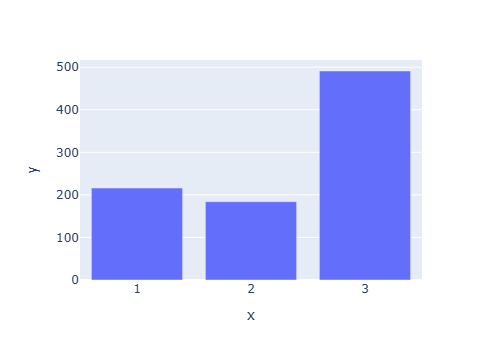

In [41]:
classCounts = (
    df["Pclass"]
    .value_counts()
    .sort("Pclass")
    .with_columns(
        pl.col("Pclass").cast(pl.Utf8)
    )
)

px.bar(
    x=classCounts["Pclass"],
    y=classCounts["count"]
)

In [27]:
(
    pl.scan_csv(CSV_FILE)
    .select(
        pl.col("Pclass").value_counts()
    )
    .collect()
    ["Pclass"]
)

Pclass
struct[2]
"{2,184}"
"{3,491}"
"{1,216}"


In [28]:
print(
    pl.scan_csv(CSV_FILE)
    .select(
        pl.col("Pclass").value_counts()
    )
    .explain()
)

SELECT [col("Pclass").value_counts()]
  Csv SCAN [./data/titanic.csv] [id: 6044597229808]
  PROJECT 1/12 COLUMNS


In [29]:
df = pl.read_csv(CSV_FILE)
df.head(3)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S"""


In [30]:
(
    df
    .group_by("Pclass")
    .agg(
        pl.col("Fare").mean()
    )
)

Pclass,Fare
i64,f64
2,20.662183
1,84.154687
3,13.67555


In [31]:
(
    df
    .group_by("Pclass")
    .agg(
        pl.col("Fare")
    )
)

Pclass,Fare
i64,list[f64]
1,"[71.2833, 53.1, … 30.0]"
3,"[7.25, 7.925, … 7.75]"
2,"[30.0708, 16.0, … 13.0]"


In [32]:
(
    df
    .group_by("Pclass", "Survived")
    .agg(
        pl.col("Fare").mean()
    )
)

Pclass,Survived,Fare
i64,i64,f64
1,1,95.608029
1,0,64.684008
2,0,19.412328
2,1,22.0557
3,1,13.694887
3,0,13.669364


In [33]:
(
    df
    .group_by(pl.col("Age").cast(pl.Int64))
    .agg(
        pl.col("Fare").mean()
    )
    .head()
)

Age,Fare
i64,f64
35,89.3125
42,37.125646
21,31.565621
12,11.2417
56,43.976025


In [34]:
(
    df
    .group_by(
        age_integer = pl.col("Age").cast(pl.Int64)
    )
    .agg(
        pl.col("Fare").mean()
    )
    .head()
)

age_integer,Fare
i64,f64
32,24.04458
59,10.375
43,59.7975
64,144.5
71,42.0792


In [35]:
print(
    pl.scan_csv(CSV_FILE)
    .group_by("Pclass")
    .agg(
        pl.col("Fare").mean()
    )
    .explain()
)

AGGREGATE[maintain_order: false]
  [col("Fare").mean()] BY [col("Pclass")]
  FROM
  Csv SCAN [./data/titanic.csv] [id: 6044597230192]
  PROJECT 2/12 COLUMNS


In [36]:
print(
    pl.scan_csv(CSV_FILE)
    .group_by("Pclass")
    .agg(
        pl.col("Fare").mean()
    )
    .explain(engine=True)
)

AGGREGATE[maintain_order: false]
  [col("Fare").mean()] BY [col("Pclass")]
  FROM
  Csv SCAN [./data/titanic.csv] [id: 6044597228160]
  PROJECT 2/12 COLUMNS


In [37]:
print(
    pl.scan_csv(CSV_FILE)
    .group_by("Pclass")
    .agg(
        pl.col("Fare").mean().round(1)
    )
    .explain(engine=True)
)

AGGREGATE[maintain_order: false]
  [col("Fare").mean().round()] BY [col("Pclass")]
  FROM
  Csv SCAN [./data/titanic.csv] [id: 6044597223824]
  PROJECT 2/12 COLUMNS


In [38]:
pl.Config.set_verbose()
(
    df
    .sort("Pclass")
    .group_by("Pclass")
    .agg(
        pl.col("Fare").mean()
    )
)

Pclass,Fare
i64,f64
1,84.154688
2,20.662183
3,13.67555


In [42]:
df = pl.read_csv(CSV_FILE)
df.head(3)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S"""


In [55]:
for (pclass,), group_df in df.group_by(["Pclass"]):
    print(f"PClass: {pclass}")
    print(group_df.mean())

PClass: 3
shape: (1, 12)
┌─────────────┬──────────┬────────┬──────┬───┬────────┬──────────┬───────┬──────────┐
│ PassengerId ┆ Survived ┆ Pclass ┆ Name ┆ … ┆ Ticket ┆ Fare     ┆ Cabin ┆ Embarked │
│ ---         ┆ ---      ┆ ---    ┆ ---  ┆   ┆ ---    ┆ ---      ┆ ---   ┆ ---      │
│ f64         ┆ f64      ┆ f64    ┆ str  ┆   ┆ str    ┆ f64      ┆ str   ┆ str      │
╞═════════════╪══════════╪════════╪══════╪═══╪════════╪══════════╪═══════╪══════════╡
│ 439.154786  ┆ 0.242363 ┆ 3.0    ┆ null ┆ … ┆ null   ┆ 13.67555 ┆ null  ┆ null     │
└─────────────┴──────────┴────────┴──────┴───┴────────┴──────────┴───────┴──────────┘
PClass: 1
shape: (1, 12)
┌─────────────┬──────────┬────────┬──────┬───┬────────┬───────────┬───────┬──────────┐
│ PassengerId ┆ Survived ┆ Pclass ┆ Name ┆ … ┆ Ticket ┆ Fare      ┆ Cabin ┆ Embarked │
│ ---         ┆ ---      ┆ ---    ┆ ---  ┆   ┆ ---    ┆ ---       ┆ ---   ┆ ---      │
│ f64         ┆ f64      ┆ f64    ┆ str  ┆   ┆ str    ┆ f64       ┆ str   ┆ str      │


In [56]:
for (pclass, survived), group_df in df.group_by("Pclass", "Survived"):
    print(f"Pclass: {pclass}, Survived: {survived}")
    print(group_df.mean())

Pclass: 3, Survived: 0
shape: (1, 12)
┌─────────────┬──────────┬────────┬──────┬───┬────────┬───────────┬───────┬──────────┐
│ PassengerId ┆ Survived ┆ Pclass ┆ Name ┆ … ┆ Ticket ┆ Fare      ┆ Cabin ┆ Embarked │
│ ---         ┆ ---      ┆ ---    ┆ ---  ┆   ┆ ---    ┆ ---       ┆ ---   ┆ ---      │
│ f64         ┆ f64      ┆ f64    ┆ str  ┆   ┆ str    ┆ f64       ┆ str   ┆ str      │
╞═════════════╪══════════╪════════╪══════╪═══╪════════╪═══════════╪═══════╪══════════╡
│ 453.580645  ┆ 0.0      ┆ 3.0    ┆ null ┆ … ┆ null   ┆ 13.669364 ┆ null  ┆ null     │
└─────────────┴──────────┴────────┴──────┴───┴────────┴───────────┴───────┴──────────┘
Pclass: 2, Survived: 1
shape: (1, 12)
┌─────────────┬──────────┬────────┬──────┬───┬────────┬─────────┬───────┬──────────┐
│ PassengerId ┆ Survived ┆ Pclass ┆ Name ┆ … ┆ Ticket ┆ Fare    ┆ Cabin ┆ Embarked │
│ ---         ┆ ---      ┆ ---    ┆ ---  ┆   ┆ ---    ┆ ---     ┆ ---   ┆ ---      │
│ f64         ┆ f64      ┆ f64    ┆ str  ┆   ┆ str    ┆ f64 

In [58]:
(
    df
    .group_by("Pclass")
    .head(2)
)

Pclass,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
2,10,1,"""Nasser, Mrs. Nicholas (Adele A…","""female""",14.0,1,0,"""237736""",30.0708,null,"""C"""
2,16,1,"""Hewlett, Mrs. (Mary D Kingcome…","""female""",55.0,0,0,"""248706""",16.0,null,"""S"""
1,2,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
1,4,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
3,1,0,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
3,3,1,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S"""


In [59]:
(
    df
    .group_by("Pclass")
    .len()
)

Pclass,len
i64,u32
3,491
2,184
1,216


In [60]:
group_column = "Pclass"
(
    df
    .group_by(group_column)
    .agg(
        pl.col(pl.Float64).min().name.suffix("_min"),
        pl.col(pl.Float64).max().name.suffix("_max")
    )
)

Pclass,Age_min,Fare_min,Age_max,Fare_max
i64,f64,f64,f64,f64
2,0.67,0.0,70.0,73.5
3,0.42,0.0,74.0,69.55
1,0.92,0.0,80.0,512.3292


In [61]:
group_column = "Pclass"
(
    df
    .group_by(group_column)
    .agg(
        pl.col(pl.Float64).min().name.suffix("_min"),
        pl.col(pl.Float64).max().name.suffix("_max")
    )
    .pipe(
        lambda df: df.select([group_column] + sorted(df.columns[1:]))
    )
)

Pclass,Age_max,Age_min,Fare_max,Fare_min
i64,f64,f64,f64,f64
3,74.0,0.42,69.55,0.0
1,80.0,0.92,512.3292,0.0
2,70.0,0.67,73.5,0.0


In [62]:
group_column = "Pclass"
(
    df
    .group_by(group_column)
    .agg(
        cs.float().min().name.suffix("_min"),
        cs.float().max().name.suffix("_max")
    )
    .pipe(
        lambda df: df.select([group_column] + sorted(df.columns[1:]))
    )
)

Pclass,Age_max,Age_min,Fare_max,Fare_min
i64,f64,f64,f64,f64
2,70.0,0.67,73.5,0.0
3,74.0,0.42,69.55,0.0
1,80.0,0.92,512.3292,0.0


In [63]:
(
    df
    .group_by("Pclass")
    .map_groups(
        lambda group_df: group_df.max()        
    )
)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
890,1,1,"""Young, Miss. Marie Grice""","""male""",80.0,3,4,"""WE/P 5735""",512.3292,"""T""","""S"""
891,1,3,"""van Melkebeke, Mr. Philemon""","""male""",74.0,8,6,"""W./C. 6609""",69.55,"""G6""","""S"""
887,1,2,"""del Carlo, Mr. Sebastiano""","""male""",70.0,3,3,"""W/C 14208""",73.5,"""F4""","""S"""


In [64]:
(
    df
    .group_by("Pclass")
    .map_groups(
        lambda group_df: group_df.select(pl.col(pl.Float64)).head(2)
    )
)

Age,Fare
f64,f64
22.0,7.25
26.0,7.925
38.0,71.2833
35.0,53.1
14.0,30.0708
55.0,16.0


# Quantiles and histograms

In [3]:
df = pl.read_csv(CSV_FILE)
df.head(3)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S"""


In [4]:
df.quantile(0.9)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
f64,f64,f64,str,str,f64,f64,f64,str,f64,str,str
802.0,1.0,3.0,null,null,50.0,1.0,2.0,null,77.9583,null,null


In [5]:
(
    df
    .select(
        pl.col("Age").quantile(0.9)
    )
)

Age
f64
50.0


In [6]:
quantile_list = [0.1, 0.5, 0.9]
(
    df
    .select(
        [
            pl.col("Age").quantile(q).alias(f"Age_quantile_{q}") for q in quantile_list
        ]
    )
)

Age_quantile_0.1,Age_quantile_0.5,Age_quantile_0.9
f64,f64,f64
14.0,28.0,50.0


In [7]:
quantile_list = [0.1, 0.5, 0.9]
(
    df
    .select(
        [
            pl.col(pl.Float64).quantile(q).name.suffix(f"_quantile_{q}") for q in quantile_list
        ]
    )
)

Age_quantile_0.1,Fare_quantile_0.1,Age_quantile_0.5,Fare_quantile_0.5,Age_quantile_0.9,Fare_quantile_0.9
f64,f64,f64,f64,f64,f64
14.0,7.55,28.0,14.4542,50.0,77.9583


In [8]:
quantile_list = [0.1, 0.5, 0.9]
(
    df
    .select(
        pl.col(pl.Float64).sort()
    )
    .select(
        [
            pl.col(pl.Float64).quantile(q).name.suffix(f"_quantile_{q}") for q in quantile_list
        ]
    )
)

Age_quantile_0.1,Fare_quantile_0.1,Age_quantile_0.5,Fare_quantile_0.5,Age_quantile_0.9,Fare_quantile_0.9
f64,f64,f64,f64,f64,f64
14.0,7.55,28.0,14.4542,50.0,77.9583


In [9]:
df.select(
    pl.col("Age").quantile(0.25, interpolation="nearest").alias("Age_nearest"),
    pl.col("Age").quantile(0.25, interpolation="linear").alias("Age_linear")
)

Age_nearest,Age_linear
f64,f64
20.0,20.125


In [10]:
(
    df["Age"]
    .hist()
)

breakpoint,category,count
f64,cat,u32
8.378,"""[0.42, 8.378]""",54
16.336,"""(8.378, 16.336]""",46
24.294,"""(16.336, 24.294]""",177
32.252,"""(24.294, 32.252]""",169
40.21,"""(32.252, 40.21]""",118
48.168,"""(40.21, 48.168]""",70
56.126,"""(48.168, 56.126]""",45
64.084,"""(56.126, 64.084]""",24
72.042,"""(64.084, 72.042]""",9


In [11]:
(
    df["Age"]
    .hist(bin_count=50)
)

breakpoint,category,count
f64,cat,u32
2.0116,"""[0.42, 2.0116]""",24
3.6032,"""(2.0116, 3.6032]""",6
5.1948,"""(3.6032, 5.1948]""",14
6.7864,"""(5.1948, 6.7864]""",3
8.378,"""(6.7864, 8.378]""",7
…,…,…
73.6336,"""(72.042, 73.6336]""",0
75.2252,"""(73.6336, 75.2252]""",1
76.8168,"""(75.2252, 76.8168]""",0


In [13]:
(
    df
    ["Age"]
    .plot
    .hist()
)

alt.Chart(...)

# Pivot and melt

In [3]:
sales_data = pl.DataFrame({
    "date": ["2022-01-01", "2022-01-02", "2022-01-01", "2022-01-02", "2022-01-03"],
    "region": ["East", "West", "East", "West", "West"],
    "bike_type": ["Mountain", "Mountain", "Road", "Road", "Mountain"],
    "sales": [100, 200, 300, 400, 500]
})
sales_data

date,region,bike_type,sales
str,str,str,i64
"""2022-01-01""","""East""","""Mountain""",100
"""2022-01-02""","""West""","""Mountain""",200
"""2022-01-01""","""East""","""Road""",300
"""2022-01-02""","""West""","""Road""",400
"""2022-01-03""","""West""","""Mountain""",500


In [5]:
(
    sales_data
    .pivot(
        index="date",
        on="bike_type",
        values="sales"
    )
)

date,Mountain,Road
str,i64,i64
"""2022-01-01""",100,300
"""2022-01-02""",200,400
"""2022-01-03""",500,null


In [6]:
(
    sales_data
    .pivot(
        index="date",
        on="bike_type",
        values="sales",
        aggregate_function="mean"
    )
)

date,Mountain,Road
str,f64,f64
"""2022-01-01""",100.0,300.0
"""2022-01-02""",200.0,400.0
"""2022-01-03""",500.0,null


In [8]:
(
    sales_data
    .pivot(
        index="date",
        on=["region", "bike_type"],
        values="sales",
        aggregate_function="first"
    )
)

date,"{""East"",""Mountain""}","{""West"",""Mountain""}","{""East"",""Road""}","{""West"",""Road""}"
str,i64,i64,i64,i64
"""2022-01-01""",100,null,300,null
"""2022-01-02""",null,200,null,400
"""2022-01-03""",null,500,null,null


In [9]:
(
    sales_data
    .pivot(
        index="date",
        on=["region", "bike_type"],
        values="sales",
        aggregate_function="first"
    )
    .select("date", '{"East","Mountain"}')
)

date,"{""East"",""Mountain""}"
str,i64
"""2022-01-01""",100
"""2022-01-02""",null
"""2022-01-03""",null


In [17]:
(
    sales_data
    .pivot(
        index="date",
        on="region",
        values="sales",
        aggregate_function=pl.element().quantile(0.75, interpolation="linear")
    )
)

date,East,West
str,f64,f64
"""2022-01-01""",250.0,null
"""2022-01-02""",null,350.0
"""2022-01-03""",null,500.0


In [20]:
(
    sales_data
    .pivot(
        index="date",
        on="region",
        values="sales",
        aggregate_function="mean",
        sort_columns=True
    )
)

date,East,West
str,f64,f64
"""2022-01-01""",200.0,null
"""2022-01-02""",null,300.0
"""2022-01-03""",null,500.0


In [21]:
(
    sales_data
    .lazy()
    .collect()
    .pivot(
        index="date",
        on="region",
        values="sales",
        aggregate_function="mean",
        sort_columns=True
    )
    .lazy()
)

In [23]:
sales_pv = (
    sales_data
    .pivot(
        index="date",
        on="bike_type",
        values="sales",
        aggregate_function="mean"
    )
)
sales_pv

date,Mountain,Road
str,f64,f64
"""2022-01-01""",100.0,300.0
"""2022-01-02""",200.0,400.0
"""2022-01-03""",500.0,null


In [25]:
(
    sales_pv
    .unpivot(
        index="date",
        on=["Mountain", "Road"]
    )
)

date,variable,value
str,str,f64
"""2022-01-01""","""Mountain""",100.0
"""2022-01-02""","""Mountain""",200.0
"""2022-01-03""","""Mountain""",500.0
"""2022-01-01""","""Road""",300.0
"""2022-01-02""","""Road""",400.0
"""2022-01-03""","""Road""",null


In [26]:
(
    sales_pv
    .unpivot(
        index="date",
        variable_name="bike_type",
        value_name="sales"
    )
)

date,bike_type,sales
str,str,f64
"""2022-01-01""","""Mountain""",100.0
"""2022-01-02""","""Mountain""",200.0
"""2022-01-03""","""Mountain""",500.0
"""2022-01-01""","""Road""",300.0
"""2022-01-02""","""Road""",400.0
"""2022-01-03""","""Road""",null
